In [42]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
from colorama import Fore, Back, Style
import json
import os
import matplotlib.colors as mcolors

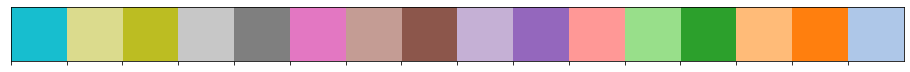

In [2]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

# Etape I --> Importer / Nettoyer

### Importation

In [3]:
wd = os.getcwd()

In [4]:
file_path = '../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv'
df = pd.read_csv(file_path, sep=',', header = 0, index_col=False)

In [5]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7209090239891..."
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7048112482231..."
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.704875754357,..."
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7049488370901..."
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7050118332264..."


### Infos

In [6]:
df.shape

(31618, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31618 entries, 0 to 31617
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31618 non-null  int64  
 1   CODE                   31618 non-null  object 
 2   NOM                    31618 non-null  object 
 3   GENRE                  31618 non-null  object 
 4   GENRE_DESC             31618 non-null  object 
 5   CATEGORIE              31618 non-null  object 
 6   CATEGORIE_DESC         31618 non-null  object 
 7   SOUS_CATEGORIE         31618 non-null  object 
 8   SOUS_CATEGORIE_DESC    31618 non-null  object 
 9   CODE_PARENT            31618 non-null  object 
 10  CODE_PARENT_DESC       31618 non-null  object 
 11  ADR_SECTEUR            31618 non-null  int64  
 12  BIEN_REFERENCE         31618 non-null  object 
 13  GENRE_BOTA             30685 non-null  object 
 14  ESPECE                 29084 non-null  object 
 15  VA

### Cleaning empty or almost empty

In [8]:
nullThreshold = len(df["ELEM_POINT_ID"])*50/100
nullThreshold

15809.0

In [9]:
df["ELEM_POINT_ID"].count()

31618

#### Utils

In [10]:
def is_suppressed(df, colName):
    nullNum = df[colName].count()
    if nullNum > nullThreshold:
        answer =  False
    else:
        answer =  True
    return answer

In [11]:
def has_more_than_one(df,col):
    value = df[col].nunique()
    if value > 1:
        return True
    else:
        return False

In [12]:
def drop_column_threshold(df):
    colSuppressed = []
    dff = df.copy()
    for col in df.columns:
        if is_suppressed(df, col):
            dff.drop(columns=col, inplace=True)
            colSuppressed.append(col)
            print(f"col suppressed : {col}")
            
    return dff, colSuppressed

In [13]:
def clean_unique_value(df):
    dff = df.copy()
    colSuppressed = []
    for col in df.columns:
        if not has_more_than_one(df,col):
            dff.drop(columns=col, inplace=True)
            colSuppressed.append(col)
            print(f"col suppressed : {col}")
    return dff, colSuppressed

In [14]:
def has_only_different_value(df,col):
    if len(df[col]) == len(df[col].value_counts()):
        return True
    else:
        return False

In [15]:
def clean_only_diff_value(df):
    dff = df.copy()
    colSuppressed = []
    for col in dff.columns:
        if has_only_different_value(dff,col) and col != "GeoJSON":
            dff.drop(columns=col, inplace=True)
            colSuppressed.append(col)
            print(f"col suppressed : {col}")
            
    return dff, colSuppressed      

#### Cleaning

In [16]:
df_clean = df.copy()

In [17]:
df_clean, colSuppressed = drop_column_threshold(df)
print("-------------------------------------------------")
print(f"Columns suppressed => {len(colSuppressed)}")
print("")

col suppressed : VARIETE
col suppressed : EQUIPE
col suppressed : REMARQUES
col suppressed : RAISONDEPLANTATION
col suppressed : TRAITEMENTCHENILLES
col suppressed : COURRIER
col suppressed : IDENTIFIANTPLU
col suppressed : TYPEIMPLANTATIONPLU
col suppressed : INTITULEPROTECTIONPLU
col suppressed : ANNEEABATTAGE
col suppressed : ESSOUCHEMENT
col suppressed : DIAMETREARBRE
col suppressed : CAUSEABATTAGE
-------------------------------------------------
Columns suppressed => 13



In [18]:
df_clean, colSuppressed = clean_unique_value(df_clean)
print("-------------------------------------------------")
print(f"Columns suppressed => {len(colSuppressed)}")
print("")

col suppressed : GENRE
col suppressed : GENRE_DESC
col suppressed : CATEGORIE
col suppressed : CATEGORIE_DESC
-------------------------------------------------
Columns suppressed => 4



In [19]:
df_clean, colSuppressed = clean_only_diff_value(df_clean)
print("-------------------------------------------------")
print(f"Columns suppressed => {len(colSuppressed)}")
print("")

col suppressed : ELEM_POINT_ID
col suppressed : CODE
col suppressed : NOM
col suppressed : BIEN_REFERENCE
-------------------------------------------------
Columns suppressed => 4



In [20]:
df_clean.columns

Index(['SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT',
       'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA', 'ESPECE',
       'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON'],
      dtype='object')

### Clean Tween columns

In [21]:
df_clean.drop(columns="SOUS_CATEGORIE", inplace=True)
df_clean.drop(columns="CODE_PARENT", inplace=True)

### Parse GeoJson

In [22]:
def split_GeoJSON(df):
    dff = df.copy()
    dff['coordinates'] = dff['GeoJSON'].apply(lambda x: json.loads(x)['coordinates'])
    dff['LATITUDE'] = dff['coordinates'].apply(lambda x: x[1])
    dff['LONGITUDE'] = dff['coordinates'].apply(lambda x: x[0])
    dff['SUM_COORDINATE'] = dff['LATITUDE'] + dff['LONGITUDE']
    dff.drop(columns="GeoJSON", inplace=True)
    dff.drop(columns="coordinates", inplace=True)
    return dff

In [41]:
df_clean = split_GeoJSON(df_clean)
df_clean.to_pickle('df.pickle')

KeyError: 'GeoJSON'

----

# First Analysis

#### Utils

In [24]:
df = df_clean.copy()
df.head()

,SOUS_CATEGORIE_DESC,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LATITUDE,LONGITUDE,SUM_COORDINATE
0,Arbre de voirie,R Andrieux PM Curie R François,6,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,45.162338,5.720909,50.883247
1,Arbre de voirie,Av Rh Danube Vallier E Claires,3,Platanus,hispanica,Arbre adulte,NaN,Grenoble Alpes Métropole,45.177938,5.704811,50.882749
2,Arbre de voirie,Av Rh Danube Vallier E Claires,3,Platanus,hispanica,Arbre adulte,NaN,Grenoble Alpes Métropole,45.177932,5.704876,50.882808
3,Arbre de voirie,Av Rh Danube Vallier E Claires,3,Platanus,hispanica,Arbre adulte,NaN,Grenoble Alpes Métropole,45.177936,5.704949,50.882885
4,Arbre de voirie,Av Rh Danube Vallier E Claires,3,Platanus,hispanica,Arbre adulte,NaN,Grenoble Alpes Métropole,45.177932,5.705012,50.882944


In [25]:
df.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,LATITUDE,LONGITUDE,SUM_COORDINATE
count,31618.000000,30180.000000,31618.000000,31618.000000,31618.000000
mean,3.840819,1989.384427,45.177209,5.727567,50.904776
std,1.713904,17.372641,0.012171,0.013106,0.017970
min,1.000000,1900.000000,45.151572,5.695056,50.863142
25%,2.000000,1975.000000,45.166124,5.717559,50.893027
50%,4.000000,1985.000000,45.175822,5.729705,50.904190
75%,5.000000,2004.000000,45.187410,5.737575,50.917289
max,6.000000,2021.000000,45.224825,5.798704,51.023187


In [26]:
year = df["ANNEEDEPLANTATION"]

### Missing values remaining

<AxesSubplot:>

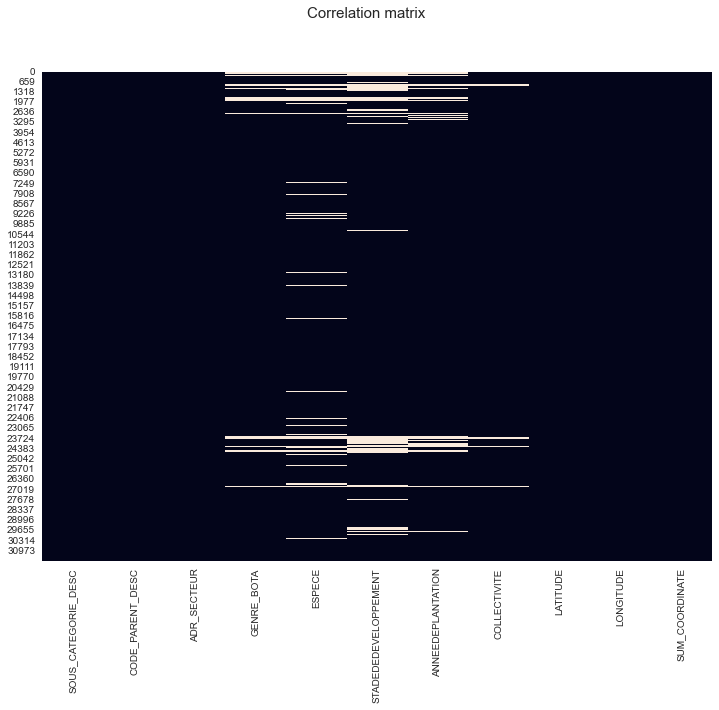

In [27]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle("Correlation matrix", fontsize=15)
sns.heatmap(df.isnull(), cbar=False)

Text(0, 0.5, 'Number of NaN values')

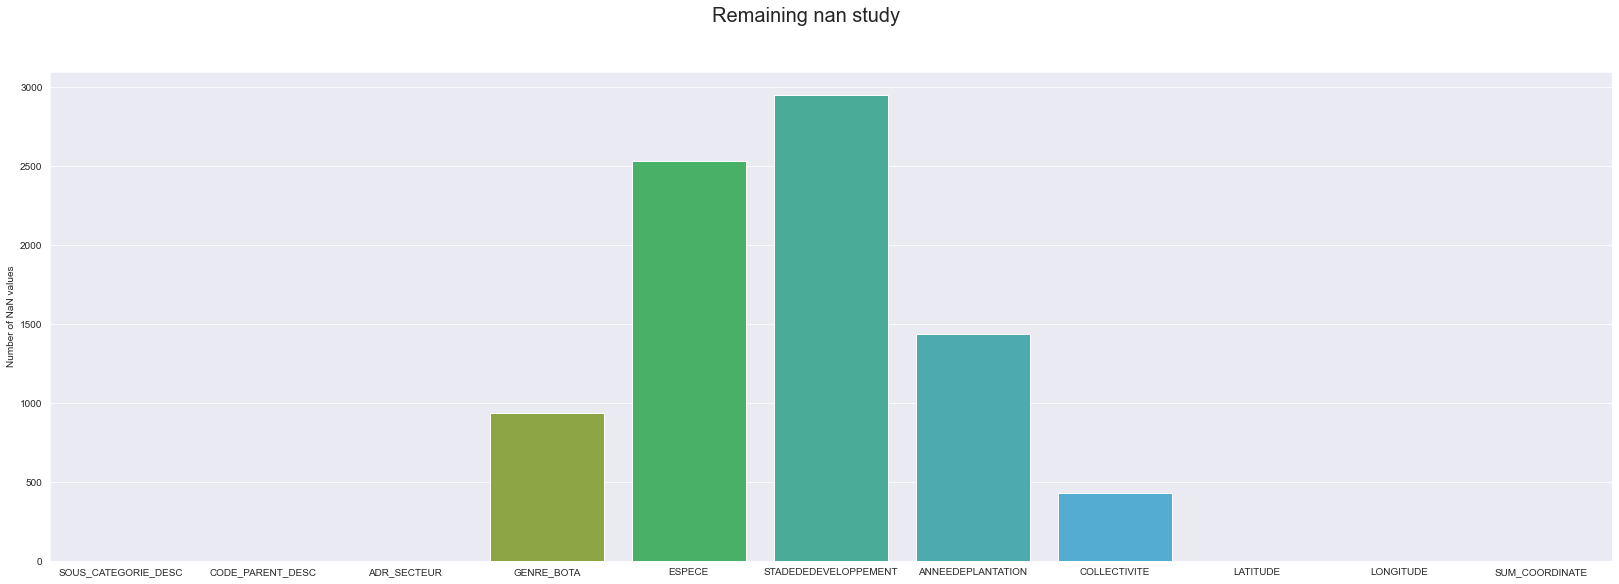

In [28]:
fig, ax = plt.subplots(figsize=(28,9))
fig.suptitle("Remaining nan study", fontsize=20)

nan_counts = df.isna().sum()

sns.barplot(x=nan_counts.index, y=nan_counts.values)

plt.ylabel('Number of NaN values')

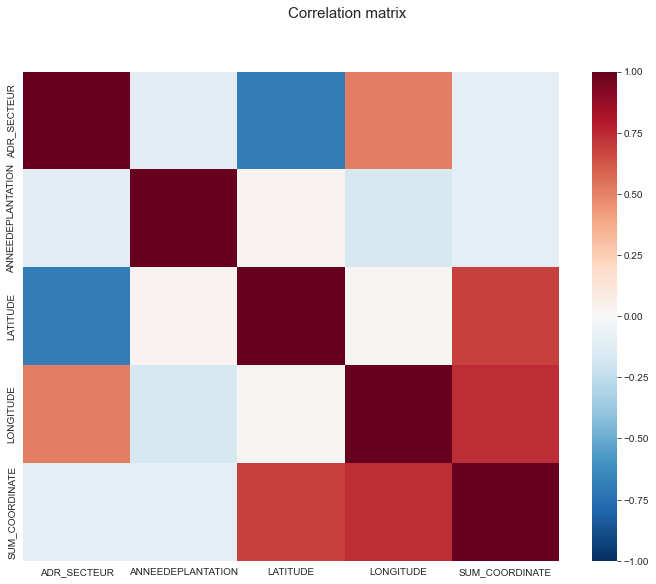

In [29]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle("Correlation matrix", fontsize=15)

ax = sns.heatmap(
        df.corr(), 
        cmap="RdBu_r", 
        vmin=-1, 
        vmax=1
    )

### Individual Numerical study

In [30]:
df.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,LATITUDE,LONGITUDE,SUM_COORDINATE
count,31618.000000,30180.000000,31618.000000,31618.000000,31618.000000
mean,3.840819,1989.384427,45.177209,5.727567,50.904776
std,1.713904,17.372641,0.012171,0.013106,0.017970
min,1.000000,1900.000000,45.151572,5.695056,50.863142
25%,2.000000,1975.000000,45.166124,5.717559,50.893027
50%,4.000000,1985.000000,45.175822,5.729705,50.904190
75%,5.000000,2004.000000,45.187410,5.737575,50.917289
max,6.000000,2021.000000,45.224825,5.798704,51.023187


In [31]:
df.dtypes

SOUS_CATEGORIE_DESC      object
CODE_PARENT_DESC         object
ADR_SECTEUR               int64
GENRE_BOTA               object
ESPECE                   object
STADEDEDEVELOPPEMENT     object
ANNEEDEPLANTATION       float64
COLLECTIVITE             object
LATITUDE                float64
LONGITUDE               float64
SUM_COORDINATE          float64
dtype: object

<AxesSubplot:xlabel='ADR_SECTEUR', ylabel='Count'>

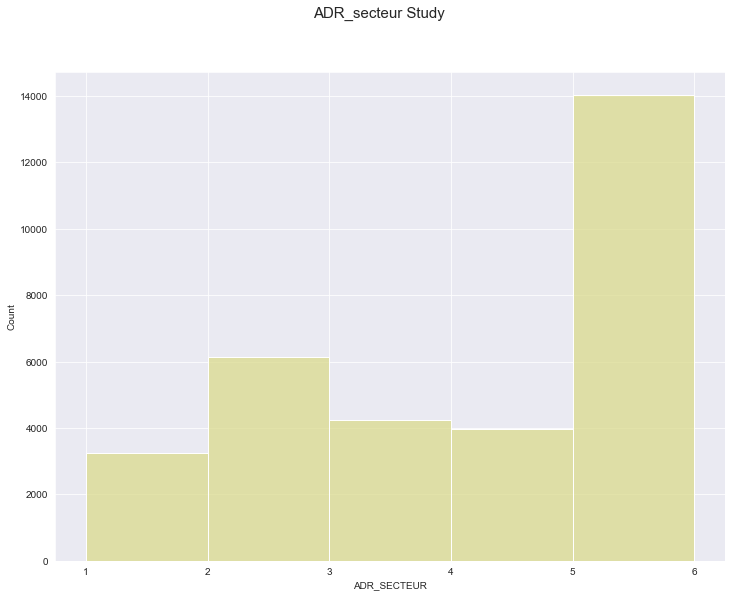

In [32]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle(f"ADR_secteur Study", fontsize=15)
sns.histplot(data=df, x='ADR_SECTEUR', binwidth=1, color=colors[1])

<AxesSubplot:xlabel='ANNEEDEPLANTATION', ylabel='Count'>

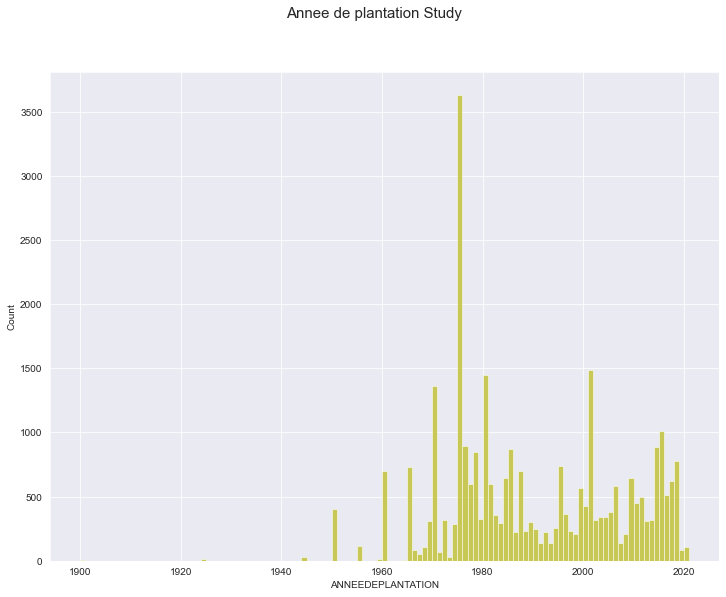

In [33]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle(f"Annee de plantation Study", fontsize=15)
sns.histplot(data=df, x='ANNEEDEPLANTATION', binwidth=1, color=colors[2])

<AxesSubplot:xlabel='LATITUDE', ylabel='Count'>

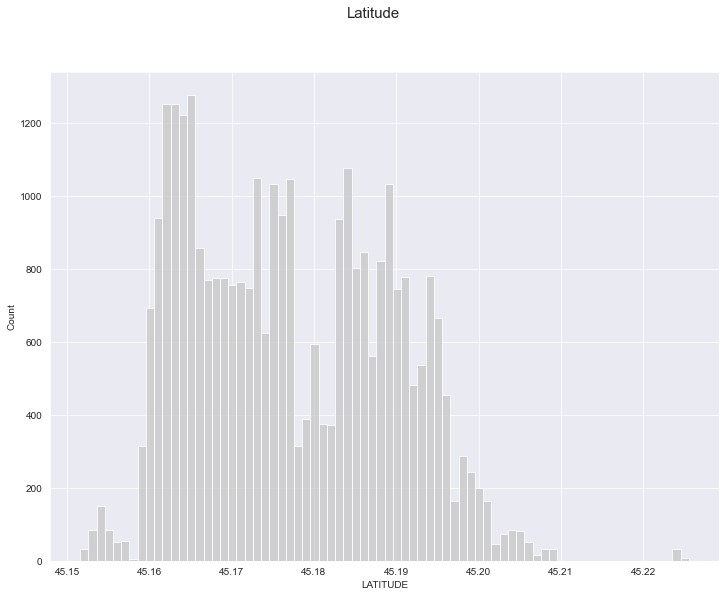

In [40]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle(f"Latitude", fontsize=15)
sns.histplot(data=df, x='LATITUDE', binwidth=0.001, color=colors[3])

<AxesSubplot:xlabel='LONGITUDE', ylabel='Count'>

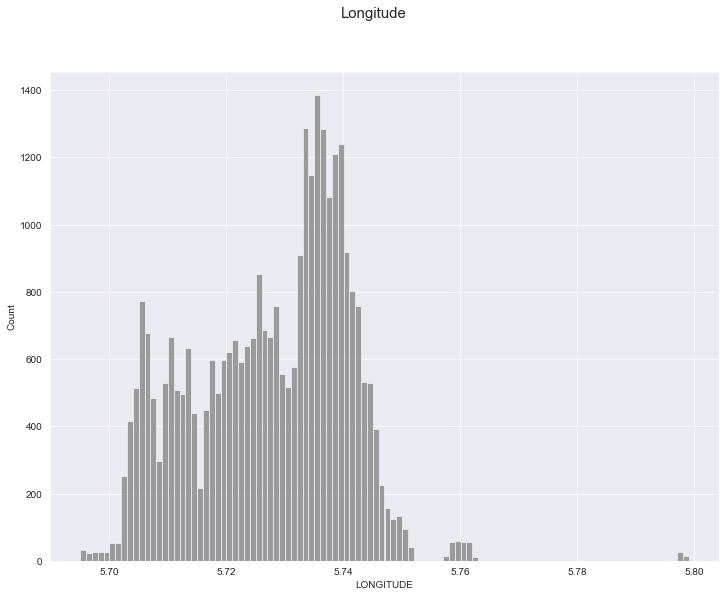

In [39]:
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle(f"Longitude", fontsize=15)
sns.histplot(data=df, x='LONGITUDE', binwidth=0.001, color=colors[4])